Name: Arjun Pukale <br>
arjunpukale@gmail.com

# **Outline**


*   Visualizing Feature Maps
*   Visualizing filter weights
*   CAM (Class Activation Map)






In [ ]:
import torch
print(torch.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

1.6.0+cu101
cuda:0


# Loading Dataset

In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
trainset=torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
classes=tuple(str(i) for i in range(0,10))
print(classes)

('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')


In [ ]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [ ]:
dataiter=iter(trainloader)
images,labels=dataiter.next()

print(images.shape,labels.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28]) torch.Size([4])
torch.Size([1, 28, 28])
1


In [ ]:
def imshow(img):
    npimg = img.to('cpu').numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

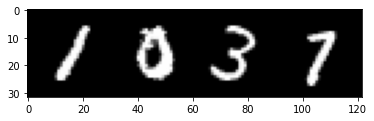

Ground Truth:  1 0 3 7


In [ ]:
imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ',' '.join(classes[labels[j]] for j in range(4)))

# Model

In [ ]:
import torch.nn.functional as F
import torch.nn as nn
from torchsummary import summary

In [ ]:
import torchvision.models as models

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.cnn_model=nn.Sequential(nn.Conv2d(1,12,7),
                             nn.ReLU(),
                             nn.MaxPool2d(2,stride=2),
                             nn.Conv2d(12,24,5),
                             nn.ReLU(),
                             nn.MaxPool2d(2,stride=2),
                             )
    self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
    self.fc_model=nn.Sequential(nn.Linear(24,16),
                                nn.ReLU(),
                                nn.Linear(16,10),
                                )
  def forward(self,x):
    x=self.cnn_model(x)
    x=self.avg_pool(x)
    x=x.view(x.size(0),-1)#flattening
    x=self.fc_model(x)
    return(x)

In [ ]:
net=Net().to(device)

In [ ]:
summary(net,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 22, 22]             600
              ReLU-2           [-1, 12, 22, 22]               0
         MaxPool2d-3           [-1, 12, 11, 11]               0
            Conv2d-4             [-1, 24, 7, 7]           7,224
              ReLU-5             [-1, 24, 7, 7]               0
         MaxPool2d-6             [-1, 24, 3, 3]               0
 AdaptiveAvgPool2d-7             [-1, 24, 1, 1]               0
            Linear-8                   [-1, 16]             400
              ReLU-9                   [-1, 16]               0
           Linear-10                   [-1, 10]             170
Total params: 8,394
Trainable params: 8,394
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 0.03
Estimated Total

In [ ]:
batch_size = 128
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

# Training

In [ ]:
import torch.optim as optim

In [ ]:
net = Net().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 84.30, Train acc: 83.48
Epoch: 1/16, Test acc: 89.81, Train acc: 89.29
Epoch: 2/16, Test acc: 91.46, Train acc: 91.04
Epoch: 3/16, Test acc: 93.09, Train acc: 92.31
Epoch: 4/16, Test acc: 94.20, Train acc: 93.67
Epoch: 5/16, Test acc: 93.56, Train acc: 93.16
Epoch: 6/16, Test acc: 95.37, Train acc: 94.72
Epoch: 7/16, Test acc: 95.42, Train acc: 94.86
Epoch: 8/16, Test acc: 96.04, Train acc: 95.67
Epoch: 9/16, Test acc: 95.52, Train acc: 95.01
Epoch: 10/16, Test acc: 96.59, Train acc: 96.13
Epoch: 11/16, Test acc: 96.58, Train acc: 96.14
Epoch: 12/16, Test acc: 96.69, Train acc: 96.26
Epoch: 13/16, Test acc: 96.67, Train acc: 96.38
Epoch: 14/16, Test acc: 97.47, Train acc: 97.03
Epoch: 15/16, Test acc: 96.88, Train acc: 96.48


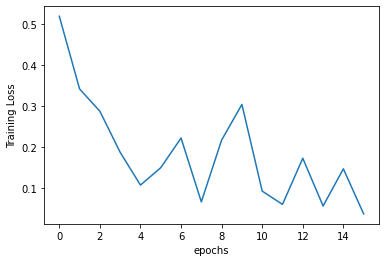

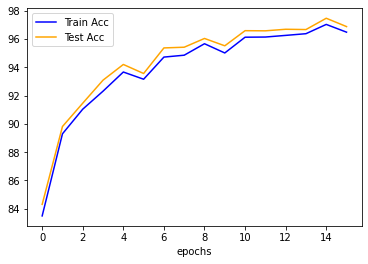

CPU times: user 3min 33s, sys: 1.85 s, total: 3min 35s
Wall time: 3min 36s


In [ ]:
%%time

loss_epoch_arr=[]
train_acc=[]
test_acc=[]
max_epochs = 16

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader,0):
    inputs,labels=data
    inputs, labels = inputs.to(device), labels.to(device)
    
    opt.zero_grad()
    
    outputs=net(inputs)
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step()

  loss_epoch_arr.append(loss.item())

  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f'%(epoch,max_epochs,evaluation(testloader),evaluation(trainloader)))
  train_acc.append(evaluation(trainloader))
  test_acc.append(evaluation(testloader))
plt.plot(loss_epoch_arr)
plt.xlabel('epochs')
plt.ylabel('Training Loss')
plt.show()
plt.plot(train_acc,label='Train Acc',color='blue')
plt.plot(test_acc,label='Test Acc',color='orange')
plt.xlabel('epochs')
plt.legend()
plt.show()


# Visualizating Feature Maps

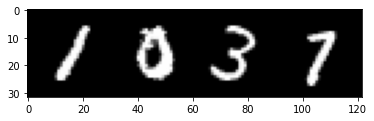

Ground Truth:  1 0 3 7


In [ ]:
imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ',' '.join(classes[labels[j]] for j in range(4)))

In [ ]:
out=net.cnn_model[0](images.to(device))
out.shape

torch.Size([4, 12, 22, 22])

In [ ]:
def single_imshow(img):
    plt.figure(figsize=(3,3))
    npimg = img.to('cpu').numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)).reshape(28,28),'gray')
    plt.axis('off')
    plt.show()

## Conv1 Feature Maps

Conv 1 gives 12 Feature Maps of size 22x22 for single input image

******* Original Image *******


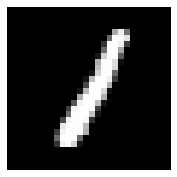

Conv 1 Feature Maps


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


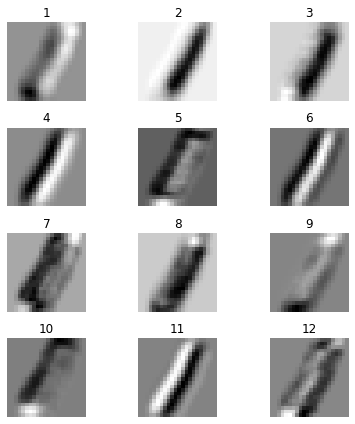

******* Original Image *******


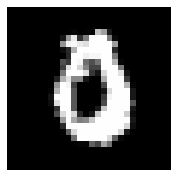

Conv 1 Feature Maps


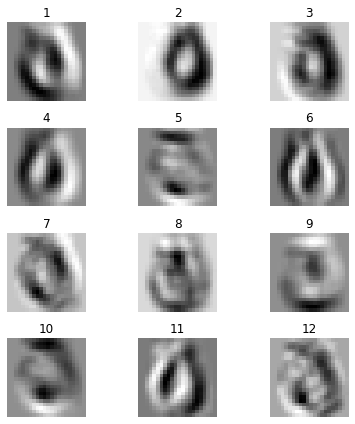

******* Original Image *******


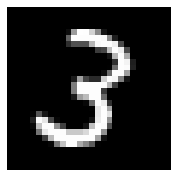

Conv 1 Feature Maps


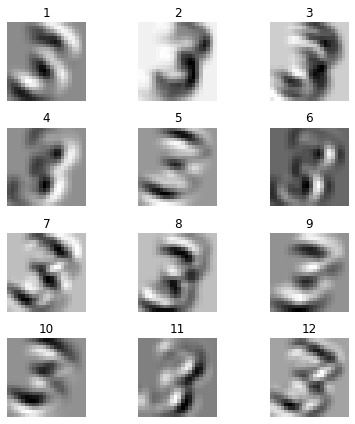

******* Original Image *******


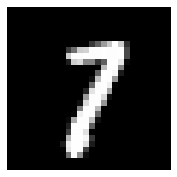

Conv 1 Feature Maps


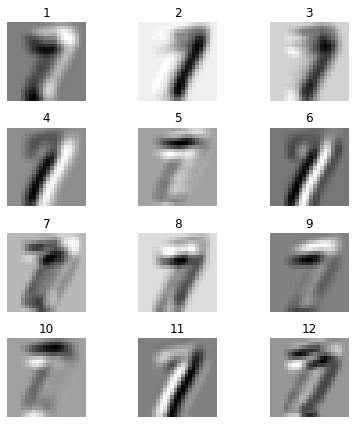

In [ ]:
for image_id in range(images.size(0)):
    print('******* Original Image *******')
    single_imshow(images[image_id])
    fig = plt.figure(figsize = (6,6))
    print('Conv 1 Feature Maps')
    plt.subplot(431)
    for i in range(12):
        plt.subplot(4, 3, i+1)
        plt.title(str(i+1))
        plt.imshow(out[image_id, i, :, :].to('cpu').detach().numpy(), cmap="binary")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


We can observe that each feature map has captured different hidden representation for the input image

## Conv2 Feature Maps

Conv 2 outputs 24 featue maps of size 7x7 for a single input volume

In [ ]:
out=net.cnn_model[0:4](images.to(device))
out.shape

torch.Size([4, 24, 7, 7])

******* Original Image *******


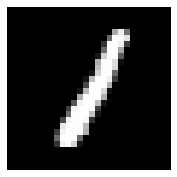

Conv 1 Feature Maps


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


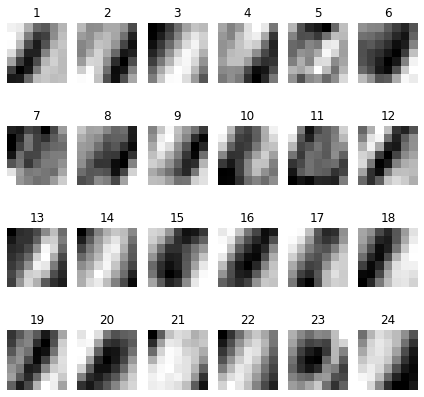

******* Original Image *******


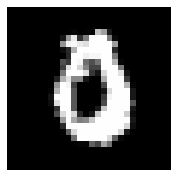

Conv 1 Feature Maps


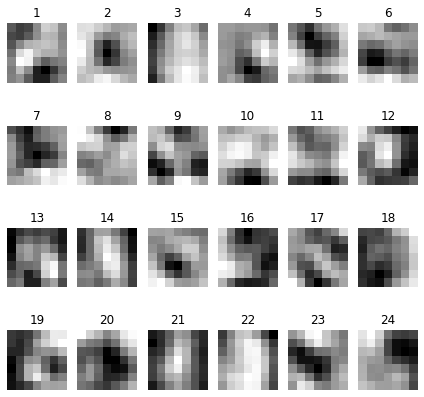

******* Original Image *******


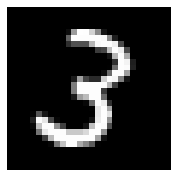

Conv 1 Feature Maps


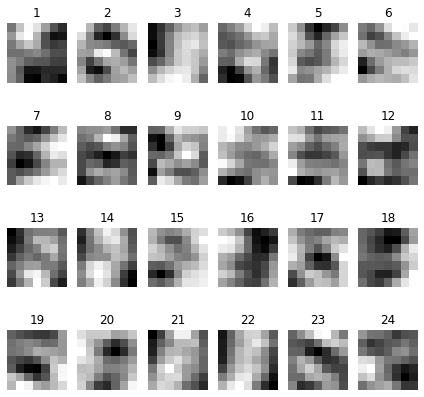

******* Original Image *******


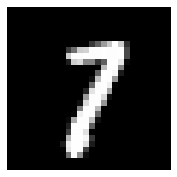

Conv 1 Feature Maps


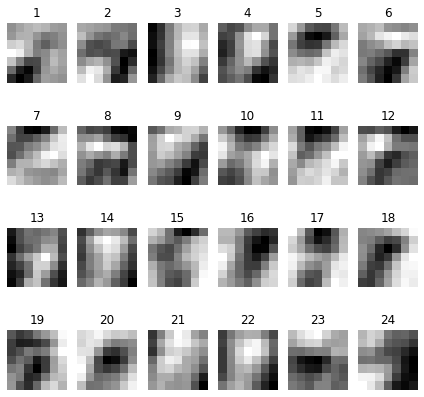

In [ ]:
for image_id in range(images.size(0)):
    print('******* Original Image *******')
    single_imshow(images[image_id])
    fig = plt.figure(figsize = (6,6))
    print('Conv 1 Feature Maps')
    plt.subplot(4,6,1)
    for i in range(24):
        plt.subplot(4, 6, i+1)
        plt.title(str(i+1))
        plt.imshow(out[image_id, i, :, :].to('cpu').detach().numpy(), cmap="binary")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Each Neuron in the Feature Map fires/activates when the filter has captured some specific pattern in the input

# Visualization Weights

In [ ]:
def plot_filters_single_channel(t):
    
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    nrows = 1 + nplots//ncols
    
    npimg = np.array(t.to('cpu').numpy(), np.float32)
    
    count = 0
    
    fig = plt.figure(figsize=(ncols, nrows), facecolor='gray')
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].to('cpu').numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg, cmap='gray')
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_weights(model, layer_num):
    layer = model.cnn_model[layer_num]
    if isinstance(layer, nn.Conv2d):
        weight_tensor = model.cnn_model[layer_num].weight.data
        plot_filters_single_channel(weight_tensor)
    else:
        print('Can only visualise layers which are convolutional')

## Conv 1 filters

There are 12 filters in Conv 1 of size 7x7

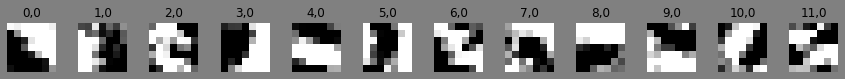

In [ ]:
plot_weights(net, 0) 

We can observe that conv 1 filters are trying to capture low level features like edges , curves from the input image

## Conv 2 filters

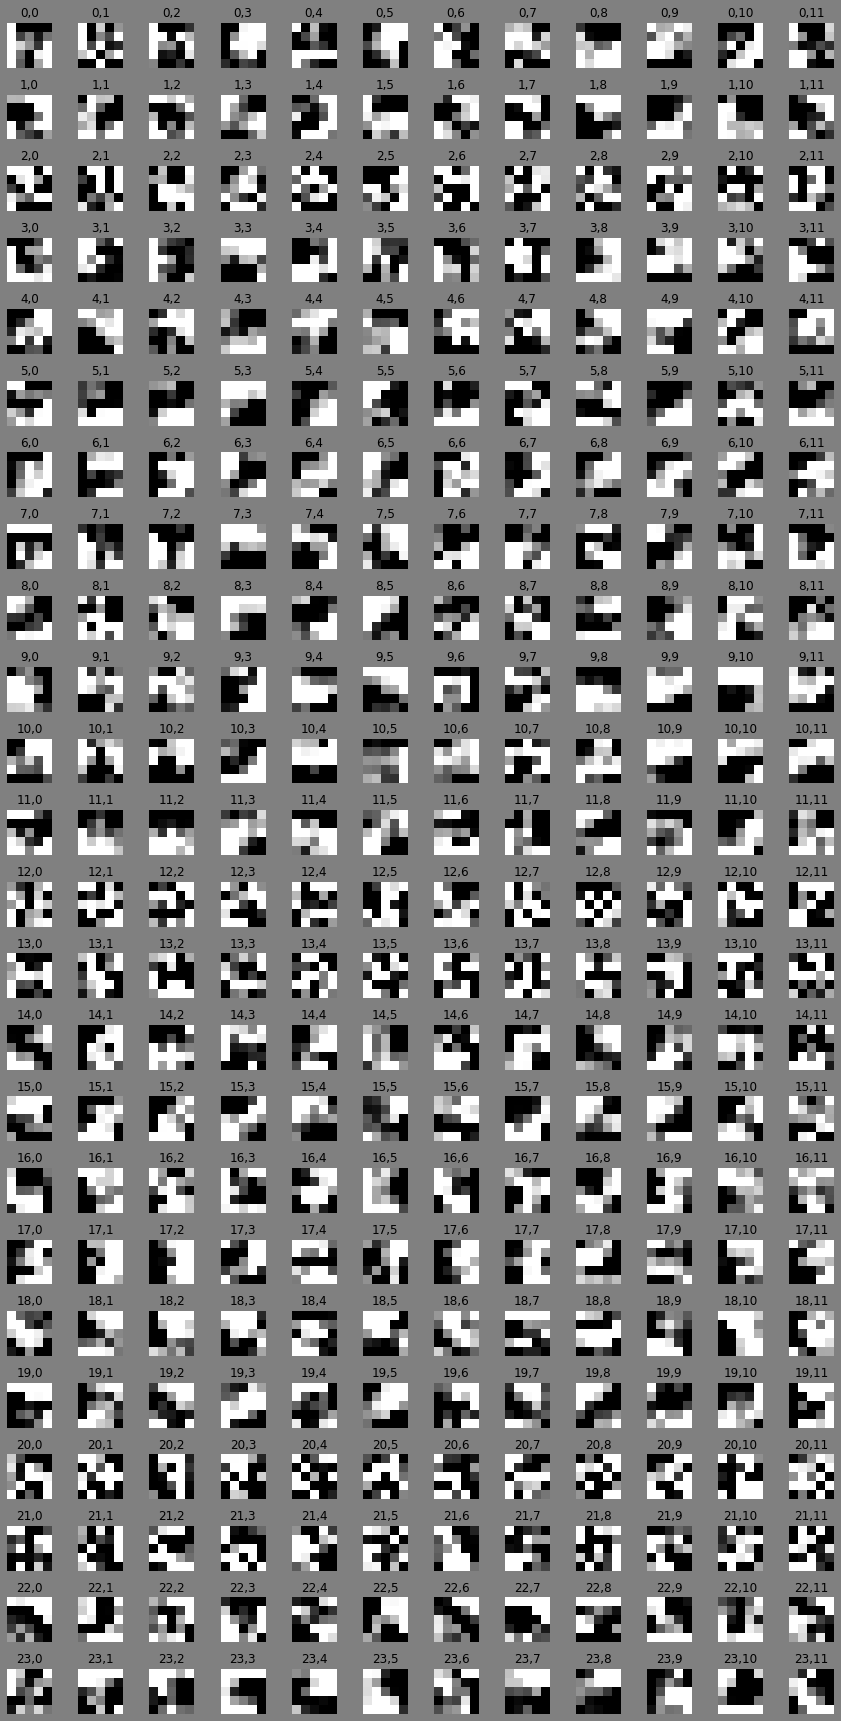

In [ ]:
plot_weights(net, 3) 

The filters in Conv 2 are trying to capture more high level features from the input volume which may not be intuitive for a human and its size is also small

## Conclusion

The Filter will capture the patterns of its weights in the input image and highlights it in the corresponding feature map.

eg:
Lets take the 2nd input image in the batch which is '0'

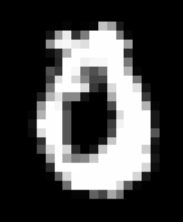

Now lets see the 1st filter of conv1

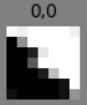

Looks like this filter captures slant edges,
now lets see its corresponding feature map:

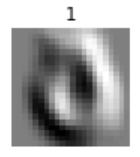

We can see that the slant edges are highlighted in the feature map

# CAM (Class Activation Map)

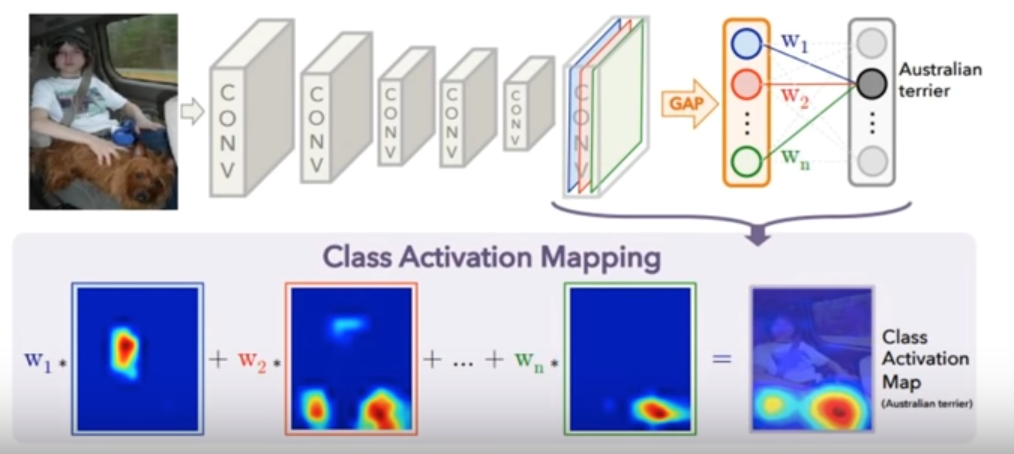

CAM helps us to diagnose the trained model and see which part of the image is responsible for the corresponding class prediction based on the magnitude of weights associated with each feature map of the last conv layer.

In [ ]:
class SaveActivations():
    activations=None
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.features = output.data
    def remove(self):
        self.hook.remove()

In [ ]:
from PIL import Image
import skimage.transform
import torchvision.models as models

In [ ]:
normalize = transforms.Normalize(
 mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225]
)

In [ ]:
preprocess = transforms.Compose([
 transforms.Resize((224,224)),
 transforms.ToTensor(),
 normalize
])

In [ ]:
display_transform = transforms.Compose([
 transforms.Resize((224,224))])

In [ ]:
model = models.resnet18(pretrained=True)
model.eval()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
def getCAM(feature_conv, weight_fc, class_idx):
    _, nc, h, w = feature_conv.shape
    cam = weight_fc[class_idx].dot(feature_conv.reshape((nc, h*w)))
    cam = cam.reshape(h, w)
    cam = cam - np.min(cam)
    cam_img = cam / np.max(cam)
    return [cam_img]

In [ ]:
weight_softmax_params = list(model._modules.get('fc').parameters())
weight_softmax = np.squeeze(weight_softmax_params[0].cpu().data.numpy())

In [ ]:
def cam(img):
    img_tensor = preprocess(img)
    model = models.resnet18(pretrained=True)
    model.eval()
    img_activations = SaveActivations(model.layer4)
    prediction = model(img_tensor.unsqueeze(0))
    pred_probabilities = F.softmax(prediction).data.squeeze()
    img_activations.remove()
    #torch.topk(pred_probabilities,1)
    class_idx = torch.topk(pred_probabilities,1)[1].int()
    overlay = getCAM(img_activations.features, weight_softmax, class_idx )
    plt.imshow(display_transform(img))
    plt.imshow(skimage.transform.resize(overlay[0], img_tensor.shape[1:3]), alpha=0.5, cmap='jet')
    plt.show()

**Lets test some cat images**

In [ ]:
img_list = ['cat1.jpg','cat2.jpg','cat3.jpg']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  import sys


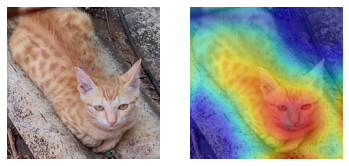

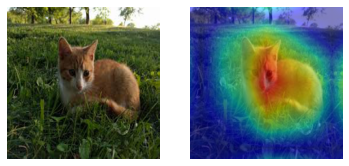

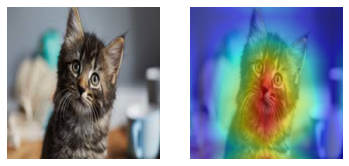

In [ ]:
for i in range(len(img_list)):
    img = Image.open(img_list[i])
    plt.subplot(121)
    plt.imshow(img.resize((224,224)))
    plt.axis('off')
    plt.subplot(122)
    plt.axis('off')
    cam(img)
    

We can observe that the model gives a lot of attention to face for identifying a cat.